# Sentiment Evaluation on Testset

Compare human annotated labels to rule-based assignment (using the policy: summing polarity scores from SentiWS) on Posts/Comments in Dev-/Testset.

In [74]:
import os

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, matthews_corrcoef, classification_report
from sklearn.utils.class_weight import compute_sample_weight

import matplotlib.pyplot as plt
%matplotlib inline

## Loading

In [53]:
data_path = "/mnt/DATA/NRW2019 Dropbox/data 4good/CSVData/TestData"
testset_fpath = os.path.join(data_path, "forSentAnalysis.csv")

testset = pd.read_csv(testset_fpath)

## Evaluation

Preprocessing

In [54]:
ratings_dict = {0: "positiv", 10: "neutral", 20: "negative", 30: "offensive", -2: "nichtBewertbar"}
sentiment_dict = {1: "positiv", -1: "negative"}
testset.replace({"Rating": ratings_dict, "sentiment": sentiment_dict}, inplace=True)

testset["rating"] = testset.Rating.astype(str)
testset["sentiment"] = testset.sentiment.astype(str)

### Confusion Matrix

In [55]:
labels = ratings_dict = ["positiv", "neutral", "negative", "offensive", "nichtBewertbar"]
cm = confusion_matrix(testset.rating, testset.sentiment, labels=labels)

Matrix

In [56]:
cm_df = pd.DataFrame(cm, columns=labels, index=labels)
cm_df.index.name = "True"
cm_df

,positiv,neutral,negative,offensive,nichtBewertbar
True,,,,,
positiv,69,0,28,0,0
neutral,83,0,153,0,0
negative,65,0,249,0,0
offensive,3,0,17,0,0
nichtBewertbar,28,0,99,0,0


Plot

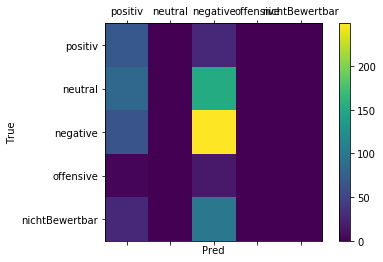

In [57]:
plot = plt.figure()
ax = plot.add_subplot(111)
cax = ax.matshow(cm)
plot.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()

### Confusion matrix 1 vs all

In [94]:
mcm = multilabel_confusion_matrix(testset.rating, testset.sentiment, labels=labels)

pos_df = pd.DataFrame(mcm[0], columns=["False", "True"], index=["False", "True"])
pos_df.index.name = "True"
print("Class 'positive':\n" , pos_df, "\n")

neg_df = pd.DataFrame(mcm[2], columns=["False", "True"], index=["False", "True"])
neg_df.index.name = "True"
print("Class 'negative':\n" , neg_df)

Class 'positive':
        False  True
True              
False    739   179
True      69    69 

Class 'negative':
        False  True
True              
False    363   297
True     147   249


### Correlation Score

Matthews Correlation Score: \[-1, 1\]

In [64]:
sample_weight = compute_sample_weight(class_weight="balanced", y=testset.rating)
corr_score = matthews_corrcoef(testset.rating, testset.sentiment, sample_weight=sample_weight)

print("Matthews Corr Score:", corr_score)

Matthews Corr Score: 0.10671342655368796


### Classification Report

In [73]:
print(classification_report(testset.rating, testset.sentiment, labels=labels))

                precision    recall  f1-score   support

       positiv       0.28      0.50      0.36       138
       neutral       0.00      0.00      0.00       311
      negative       0.46      0.63      0.53       396
     offensive       0.00      0.00      0.00        24
nichtBewertbar       0.00      0.00      0.00       187

     micro avg       0.40      0.30      0.34      1056
     macro avg       0.15      0.23      0.18      1056
  weighted avg       0.21      0.30      0.24      1056



# Conclusion

#FIXME